### Analyze list of compounds


In [50]:
import math
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

init_notebook_mode(connected=True)  # initiate notebook for offline plot

Option to set all plots to presentation mode

In [154]:
# sns.set_context("talk")
sns.set_context("notebook", font_scale=1.3, rc={"lines.linewidth": 1})

def save_fig(file_name):
    plt.savefig("figures/{}.png".format(file_name), dpi=300)
    plt.savefig("figures/{}.pdf".format(file_name))
    plt.savefig("figures/{}.svg".format(file_name))
    # plt.savefig("results/{}.eps".format(file_name))

### Load data and create list of data columns
The data table is loaded from the results folder. _value_columns_ holds all numeric columns. _class_columns_ might be
 interesting to group data.

In [52]:
df = pd.read_csv("results/full_table.tsv", sep="\t")
df["md_by_mass"] = df.apply(lambda row: row["mass_defect"]/row["exact_mass"]*100, axis=1)

value_columns = ("exact_mass	mass_defect	md_by_mass	mol_log_p	valenz	hba	hbd	num_rot_bonds	hetero_atoms	c_atoms	o_atoms	heavy_atoms").split("\t")

class_columns = ("class_results_np_classifier	superclass_results_np_classifier	pathway_results_np_classifier	isglycoside_np_classifier	fp1_np_classifier	fp2_np_classifier	kingdom_classyfire	superclass_classyfire	class_classyfire	subclass_classyfire	intermediate_nodes_classyfire	alternative_parents_classyfire	direct_parent_classyfire	molecular_framework_classyfire	substituents_classyfire	description_classyfire	external_descriptors_classyfire	ancestors_classyfire	predicted_chebi_terms_classyfire	predicted_lipidmaps_terms_classyfire	classification_version_classyfire	therapeutic_flag_chembl	natural_product_chembl	indication_class_chembl	num_chembl_entries	chirality_chembl	max_phase_chembl").split("\t")

other_columns = ("molecule_chembl_id_chembl	pref_name_chembl	molecule_synonyms_chembl	wikipedia_id_chembl	pubchem_id_chembl").split("\t")

no_distribution_columns = ("aromatic_rings	n_atoms	p_atoms	s_atoms	halogen_atoms	alogp_chembl	cx_logd_chembl	cx_logp_chembl	cx_most_apka_chembl	cx_most_bpka_chembl").split("\t")

### Tabular summary

In [159]:
total_rows = len(df)
summary = [("Total rows", total_rows),
    ("Glykoside (NP classifier)", len([1 for x in df.isglycoside_np_classifier if x == True])),
           ("chembl ID", sum([1 for x in df.num_chembl_entries if x>0])),
           ("Therapeutic flag chembl", len([1 for x in df.therapeutic_flag_chembl if x==True])),
           ("Natural product flag chembl", len([1 for x in df.natural_product_chembl if x==True])),
           ("Approved drug chembl", len([1 for x in df.max_phase_chembl if x==4])),
           ("At least stage one drug chembl", len([1 for x in df.max_phase_chembl if x>0])),
           ("N containing", len([1 for x in df.n_atoms if x>0])),
           ("O containing", len([1 for x in df.o_atoms if x>0])),
           ("Heavy atoms containing", len([1 for x in df.heavy_atoms if x>0])),
           ("Hetero atoms containing", len([1 for x in df.hetero_atoms if x>0])),
           ("NP classifier", len([1 for x in df.class_results_np_classifier if str(x).strip()])),
           ]

summary_df = pd.DataFrame(summary, columns=["Description", "Value"])
summary_df["Relative"] = summary_df["Value"].apply(lambda x: round(x/total_rows*100,1))
summary_df

,Description,Value,Relative
0,Total rows,4386,100.0
1,Glykoside (NP classifier),1560,35.6
2,chembl ID,1020,23.3
3,Therapeutic flag chembl,20,0.5
4,Natural product flag chembl,20,0.5
5,Approved drug chembl,24,0.5
6,At least stage one drug chembl,52,1.2
7,N containing,649,14.8
8,O containing,4383,99.9
9,Heavy atoms containing,4386,100.0


### NP classifier results

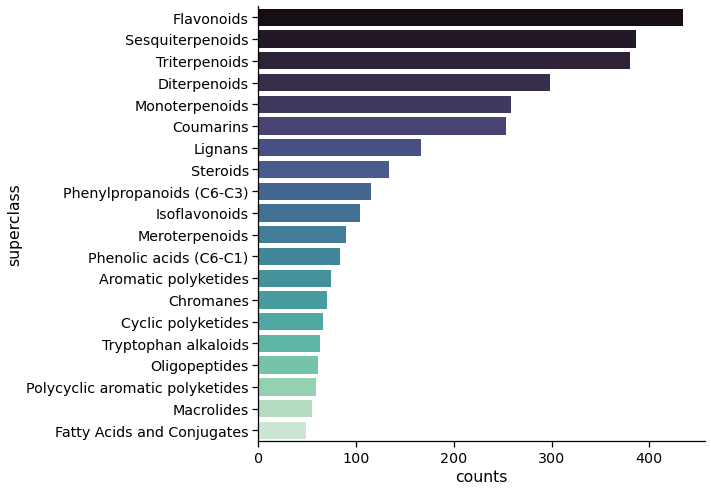

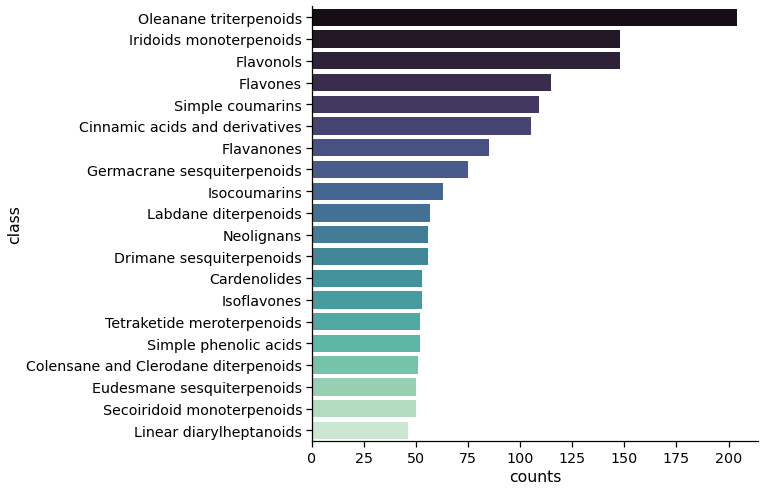

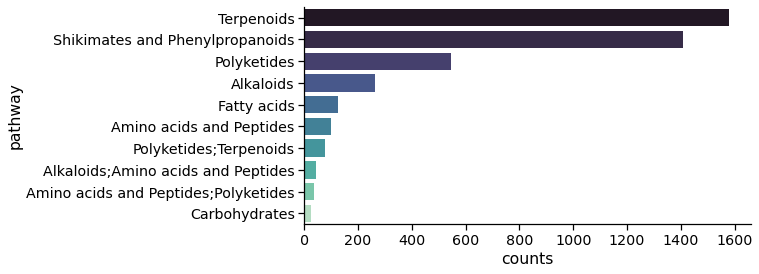

In [158]:
# count classes, create data frame, take top 20 entries
classes = df['class_results_np_classifier'].value_counts().rename_axis("class").reset_index(name="counts").head(20)
superclass = df['superclass_results_np_classifier'].value_counts().rename_axis("superclass").reset_index(name="counts").head\
    (20)
pathway = df['pathway_results_np_classifier'].value_counts().rename_axis("pathway").reset_index(name="counts").head(10)
# classes = classes.loc[classes['counts'] > 10]  # select over value
colors = sns.color_palette("crest", as_cmap=True)

plt.figure(figsize=(8, 8))
sns.barplot(x="counts", y="superclass", data=superclass, palette="mako")
sns.despine()
save_fig("np_superclass")

plt.figure(figsize=(8, 8))
sns.barplot(x="counts", y="class", data=classes, palette="mako")
sns.despine()
save_fig("np_class")

plt.figure(figsize=(8, 4))
sns.barplot(x="counts", y="pathway", data=pathway, palette="mako")
sns.despine()
save_fig("np_pathway")

### Classyfire results

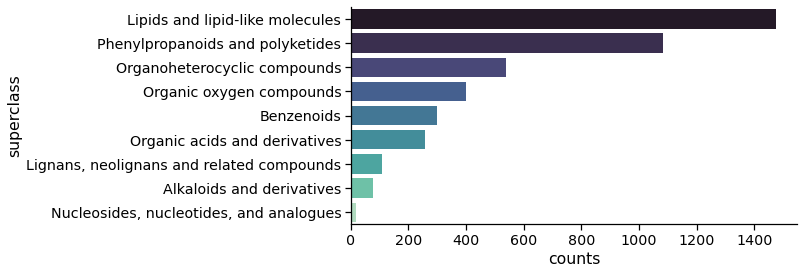

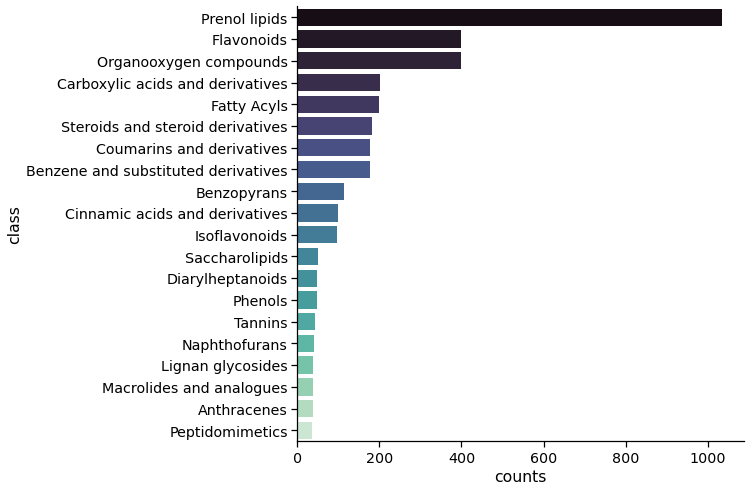

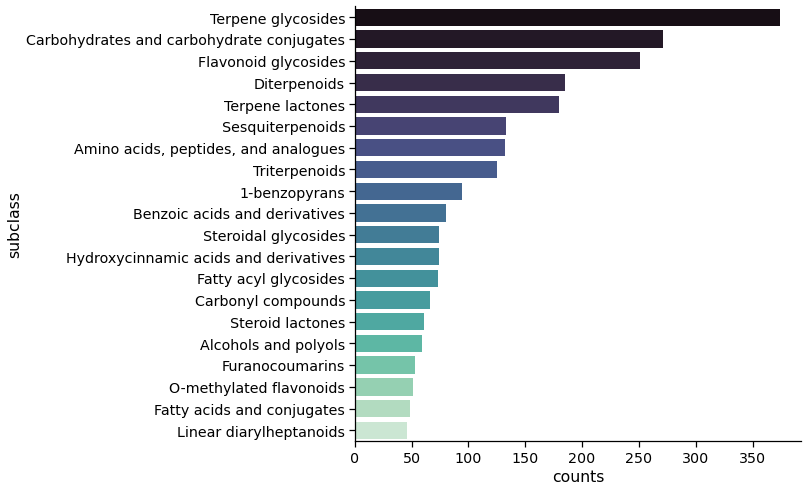

In [157]:
superclass = df['superclass_classyfire'].value_counts().rename_axis("superclass").reset_index(name="counts").head(9)
plt.figure(figsize=(8, 4))
sns.barplot(x="counts", y="superclass", data=superclass, palette="mako")
sns.despine()
save_fig("classyfire_superclass")

classes = df['class_classyfire'].value_counts().rename_axis("class").reset_index(name="counts").head(20)
plt.figure(figsize=(8, 8))
sns.barplot(x="counts", y="class", data=classes, palette="mako")
sns.despine()
save_fig("classyfire_classes")

subclass = df['subclass_classyfire'].value_counts().rename_axis("subclass").reset_index(name="counts").head(20)
plt.figure(figsize=(8, 8))
sns.barplot(x="counts", y="subclass", data=subclass, palette="mako")
sns.despine()
save_fig("classyfire_subclass")


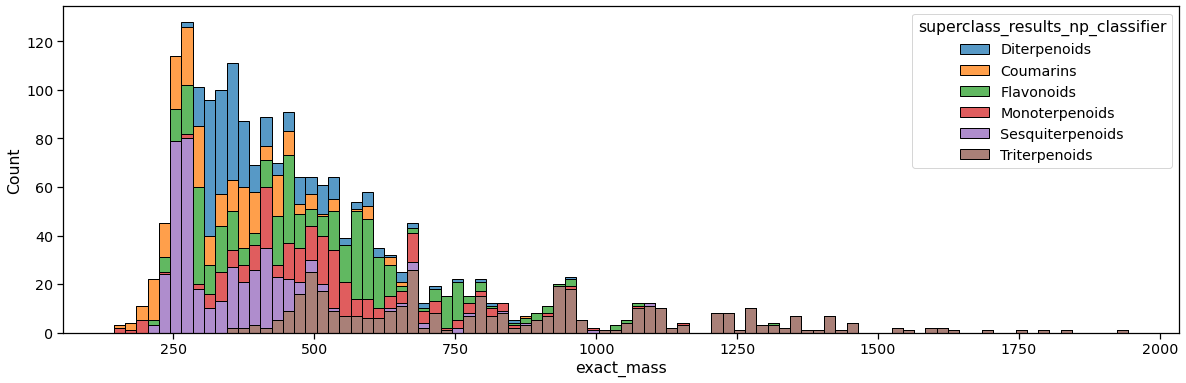

In [217]:
# take top n of np superclass
np_superclass = df['superclass_results_np_classifier'].value_counts().rename_axis("superclass").reset_index\
    (name="counts").head(6)

filtered_df = df.loc[df["superclass_results_np_classifier"].isin(np_superclass["superclass"])]

plt.figure(figsize=(20, 6))
# sns.violinplot(y="superclass_results_np_classifier", x="exact_mass", data=filtered_df)
sns.histplot(data=filtered_df, x="exact_mass", binwidth=20, hue="superclass_results_np_classifier",
                 multiple="stack")
save_fig("histo_np_superclass_top6_mass")

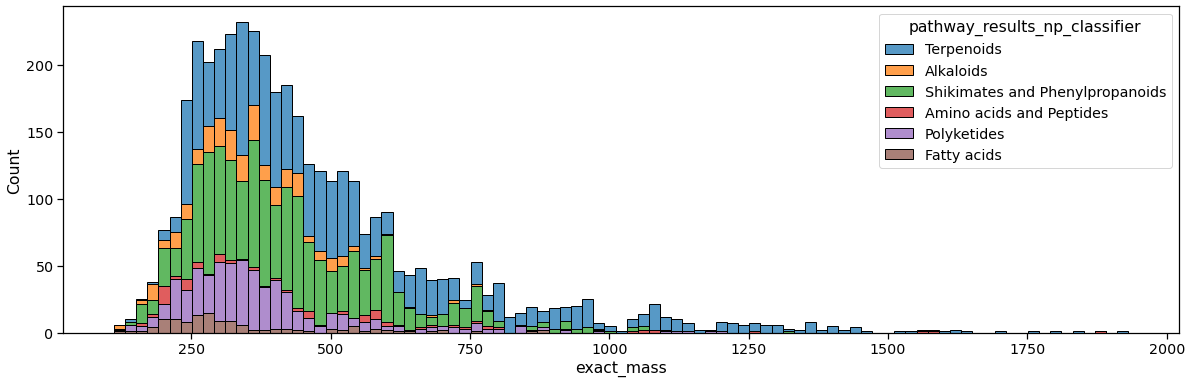

In [216]:
# take top n of np superclass
np_superclass = df['pathway_results_np_classifier'].value_counts().rename_axis("pathway").reset_index\
    (name="counts").head(6)

filtered_df = df.loc[df["pathway_results_np_classifier"].isin(np_superclass["pathway"])]

plt.figure(figsize=(20, 6))
sns.histplot(data=filtered_df, x="exact_mass", binwidth=20, hue="pathway_results_np_classifier",
                 multiple="stack")
save_fig("histo_np_pathways_top6_mass")

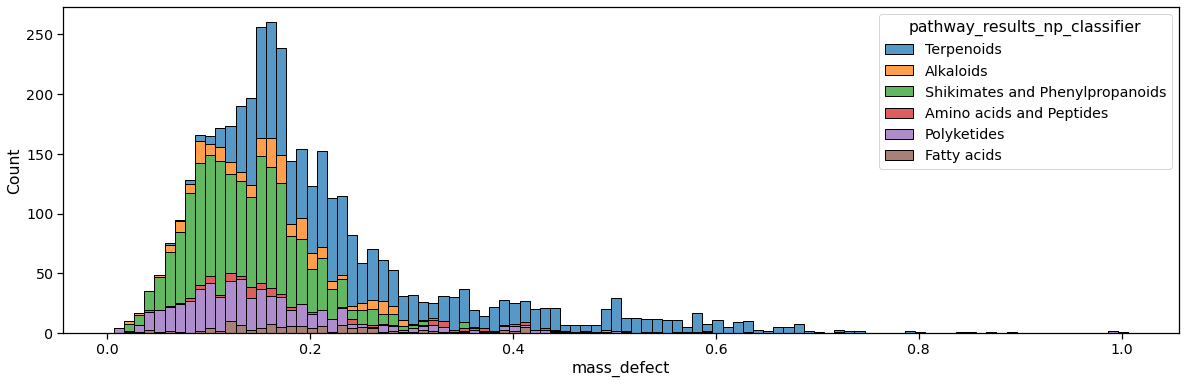

In [218]:
# take top n of np superclass
np_superclass = df['pathway_results_np_classifier'].value_counts().rename_axis("pathway").reset_index\
    (name="counts").head(6)

filtered_df = df.loc[df["pathway_results_np_classifier"].isin(np_superclass["pathway"])]

plt.figure(figsize=(20, 6))
sns.histplot(data=filtered_df, x="mass_defect", binwidth=0.01, hue="pathway_results_np_classifier",
                 multiple="stack")
save_fig("histo_np_pathways_top6_md")

In [201]:


# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(filtered_df, row="superclass_results_np_classifier",
                  hue="superclass_results_np_classifier",
                  aspect=15, height=10, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "exact_mass",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "exact_mass", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(exact_mass, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "exact_mass")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

SyntaxError: keyword argument repeated: palette (Temp/ipykernel_12672/1323220678.py, line 3)

### 2D distribution

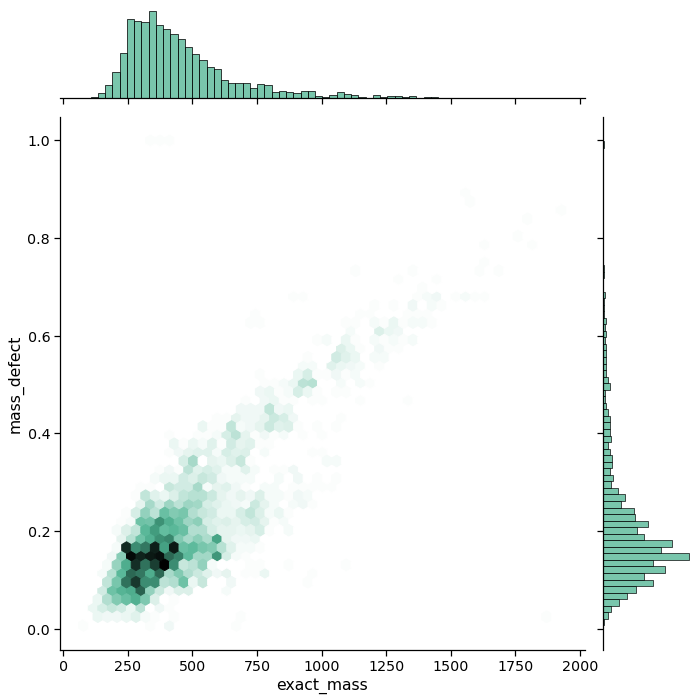

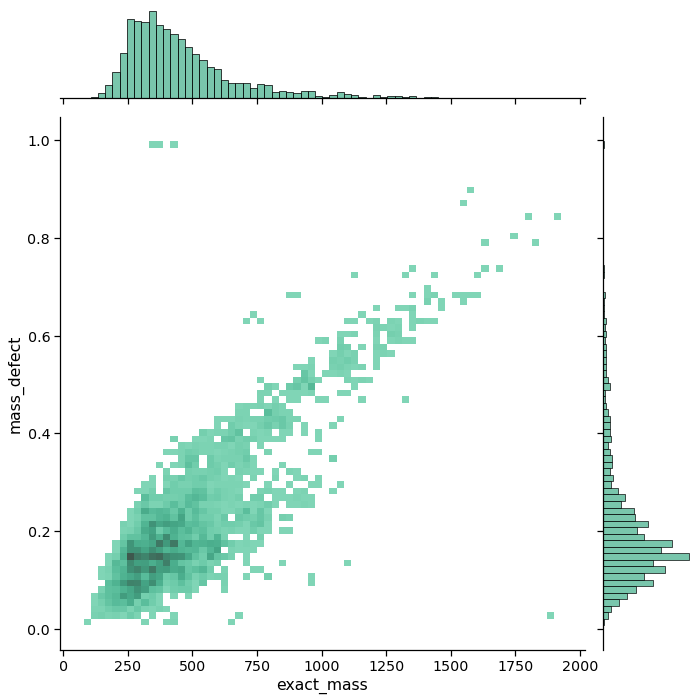

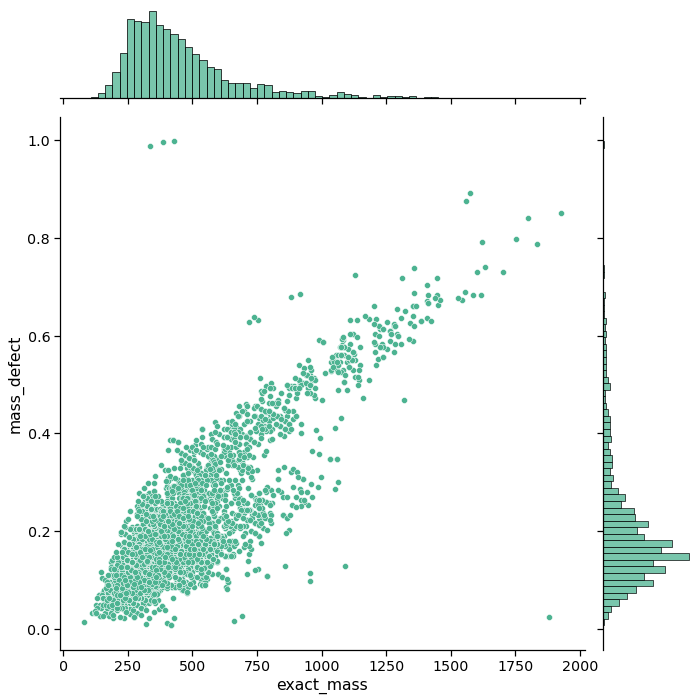

In [169]:
sns.jointplot(data=df, x="exact_mass", y="mass_defect", kind="hex", color="#4CB391", height=10)
save_fig("joint_mass_md")
sns.jointplot(data=df, x="exact_mass", y="mass_defect", kind="hist", color="#4CB391", height=10)
save_fig("joint_mass_md_b")
sns.jointplot(data=df, x="exact_mass", y="mass_defect", color="#4CB391", height=10)
save_fig("joint_mass_md_c")

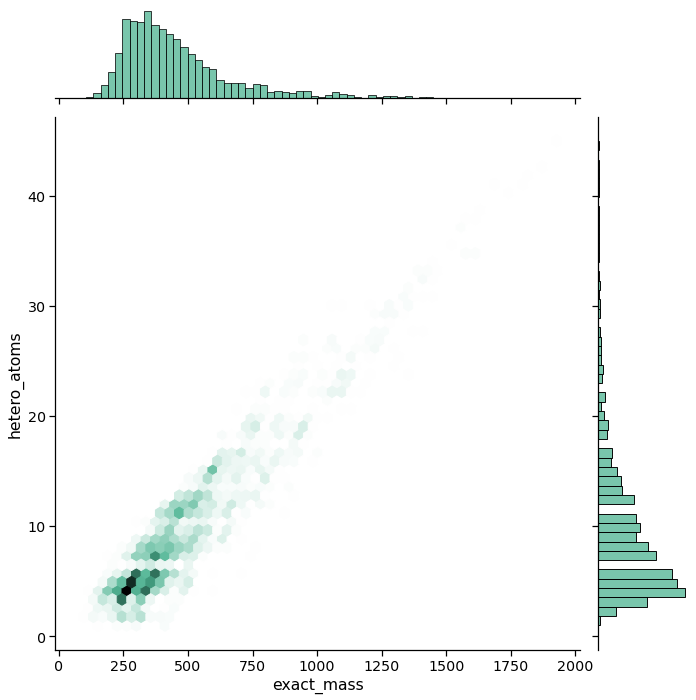

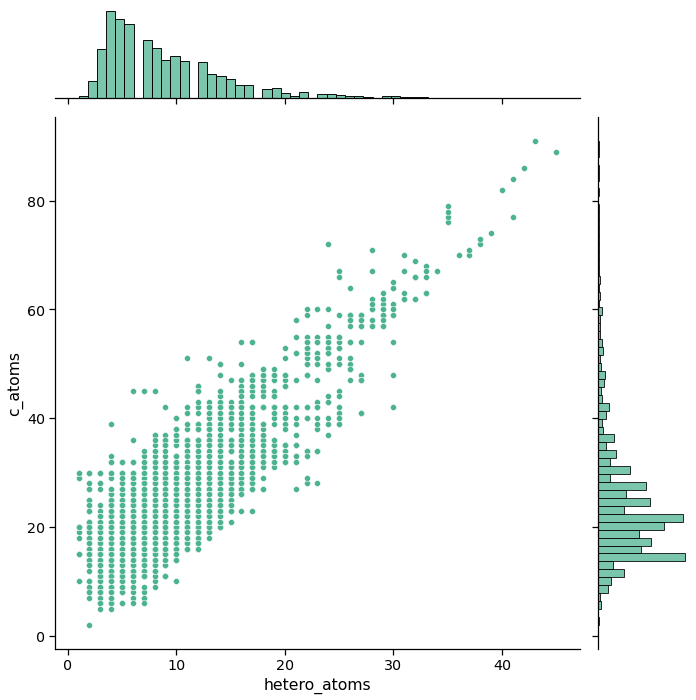

In [164]:
sns.jointplot(data=df, x="exact_mass", y="hetero_atoms", kind="hex", color="#4CB391",height=10)
sns.jointplot(data=df, x="hetero_atoms", y="c_atoms", color="#4CB391", height=10)

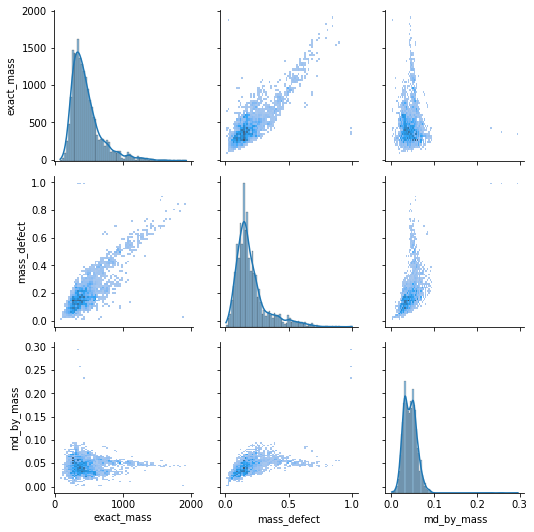

In [46]:

# num_rot_bonds, hetero_atoms
g = sns.PairGrid(df, vars=["exact_mass","mass_defect","md_by_mass"])
g.map_upper(sns.histplot)
g.map_lower(sns.histplot)
g.map_diag(sns.histplot, kde=True)

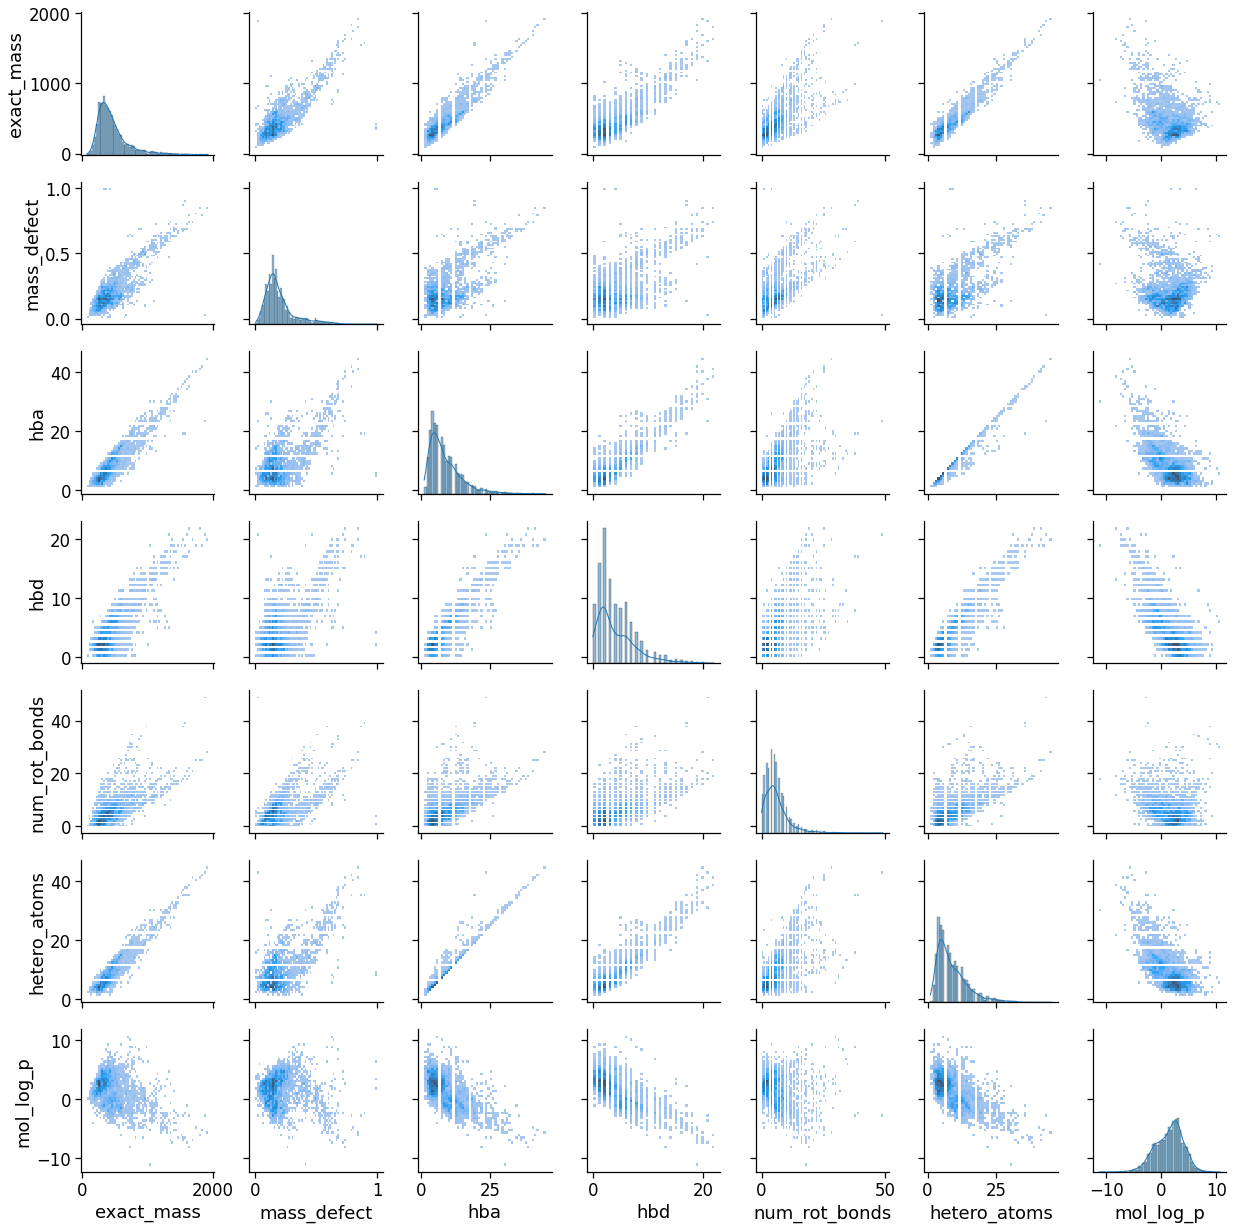

In [80]:
# num_rot_bonds, hetero_atoms mol_log_p	valenz	hba	hbd	num_rot_bonds	hetero_atoms	c_atoms	o_atoms	heavy_atoms
g = sns.PairGrid(df, vars=["exact_mass","mass_defect","hba", "hbd", "num_rot_bonds", "hetero_atoms", "mol_log_p"])
g.map_upper(sns.histplot)
g.map_lower(sns.histplot)
g.map_diag(sns.histplot, kde=True)

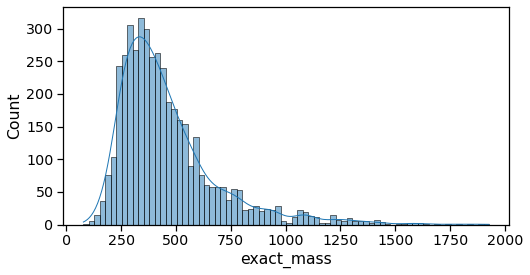

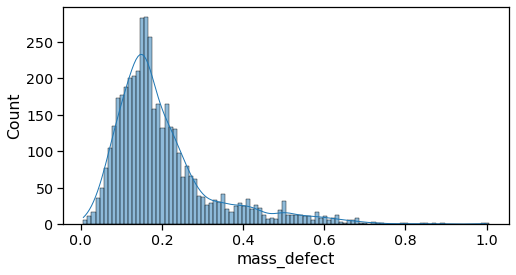

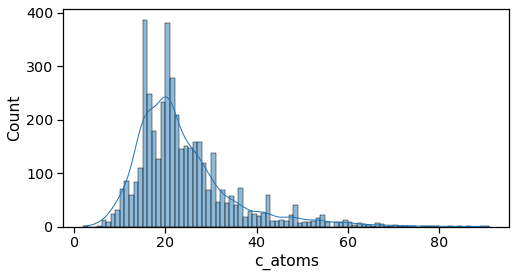

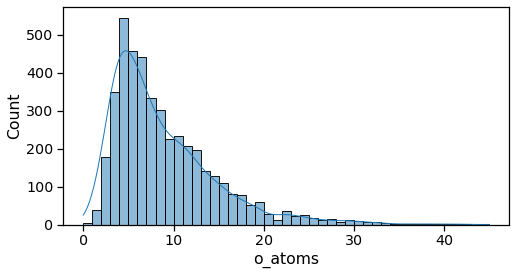

In [210]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x="exact_mass", binwidth=25, kde=True)
save_fig("histo_exact_mass")

plt.figure(figsize=(8, 4))
sns.histplot(data=df, x="mass_defect", binwidth=0.01, kde=True)
save_fig("histo_mass_defect")

plt.figure(figsize=(8, 4))
sns.histplot(data=df, x="c_atoms", binwidth=1, kde=True)
save_fig("histo_c_atoms")

plt.figure(figsize=(8, 4))
sns.histplot(data=df, x="o_atoms", binwidth=1, kde=True)
save_fig("histo_o_atoms")

### Plot specific data as grid

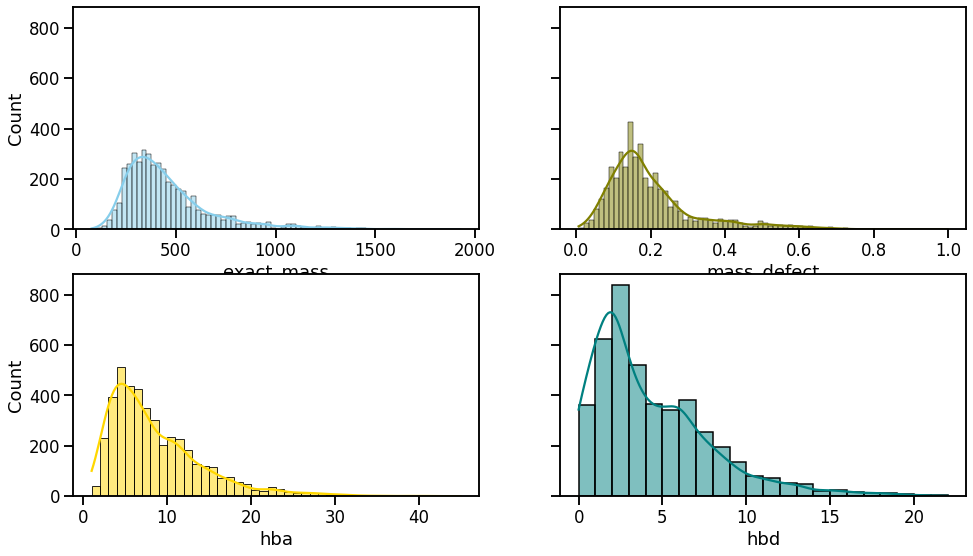

In [63]:
fig, axs = plt.subplots(2, 2, sharey=True, figsize=(16, 9))

sns.histplot(data=df, x="exact_mass", binwidth=25, kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="mass_defect", kde=True, color="olive", ax=axs[0, 1])
# hba and hbd are int values with discrete intevals - therefore set bins to avoid gaps
sns.histplot(data=df, x="hba", binwidth=1, kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="hbd", binwidth=1, kde=True, color="teal", ax=axs[1, 1])

plt.show()
save_fig("hist_multi")

### Histogram grid of all value columns

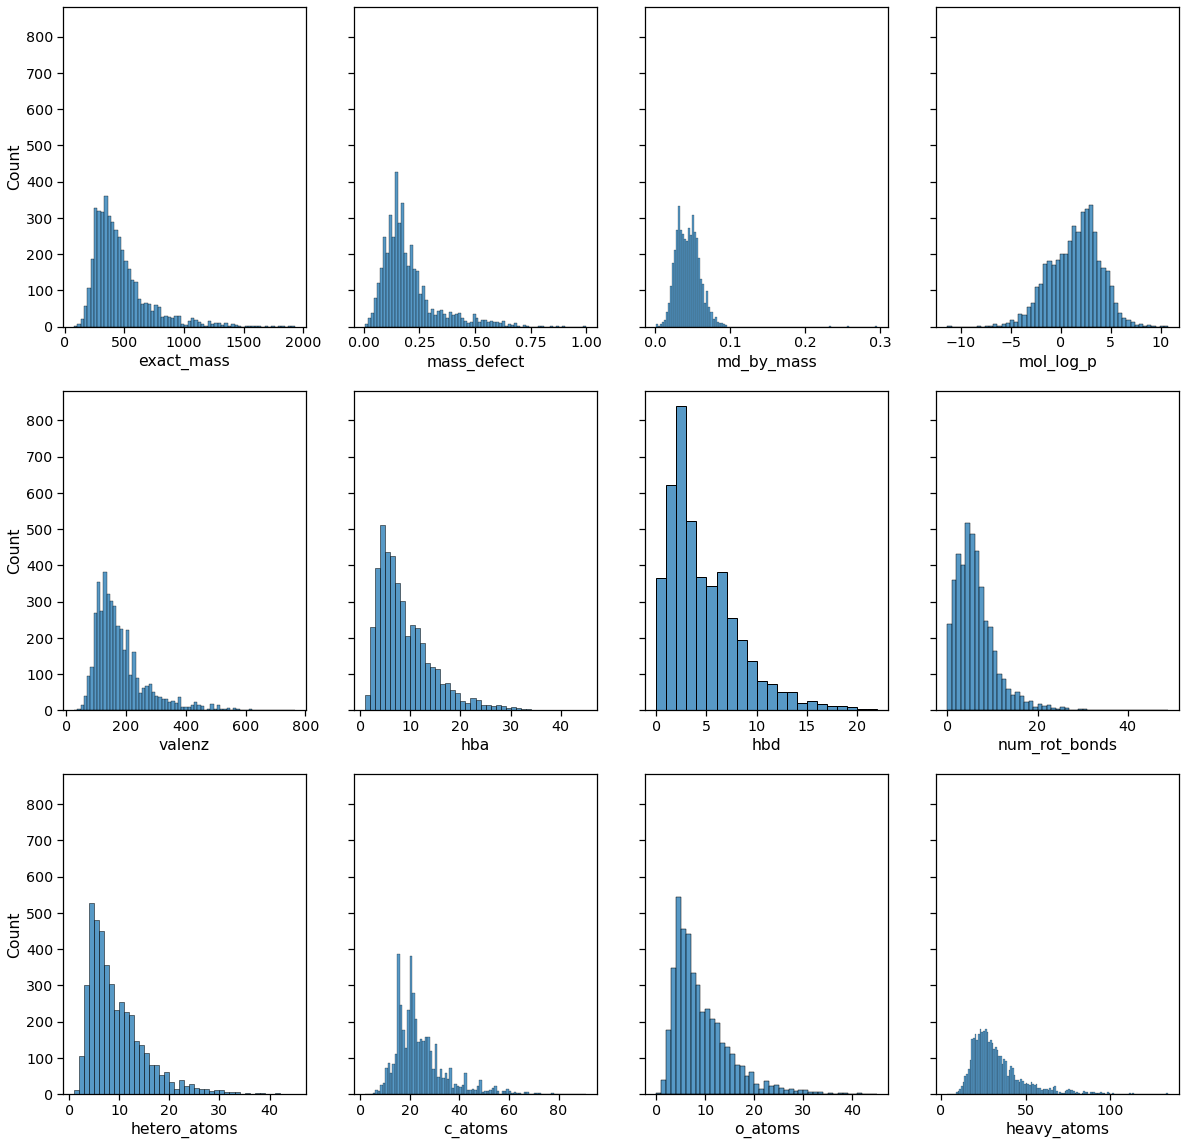

<Figure size 432x288 with 0 Axes>

In [219]:
# create grid
cols = 4
rows = math.ceil(len(value_columns)/cols)
fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(20, 20))

discrete_values_start_index = 5

for index, column in enumerate(value_columns):
    ci = index % cols
    ri = math.floor(index / cols)
    if index >= discrete_values_start_index:
        sns.histplot(data=df, binwidth=1, x=column, ax=axs[ri, ci])
    else:
        sns.histplot(data=df, x=column, ax=axs[ri, ci])

plt.show()
save_fig("histo_multi")
